In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

dfHis = pd.read_excel('HISTORICO_SUERTES.xlsx')
dfIPSA = pd.read_excel('BD_IPSA_1940.xlsx' )

# Información de los DataFrames
print("---DataFrame HISTORICO---") 
print(dfHis.head())
print(dfHis.columns)
print(dfHis.shape)
print(dfHis.describe())
print(dfHis.isnull().sum())
print("---DataFrame BD_IPSA---") 
print(dfIPSA.head())
print(dfIPSA.columns)
print(dfIPSA.shape)
print(dfIPSA.describe())
print(dfIPSA.isnull().sum())


---DataFrame HISTORICO---
   Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN      

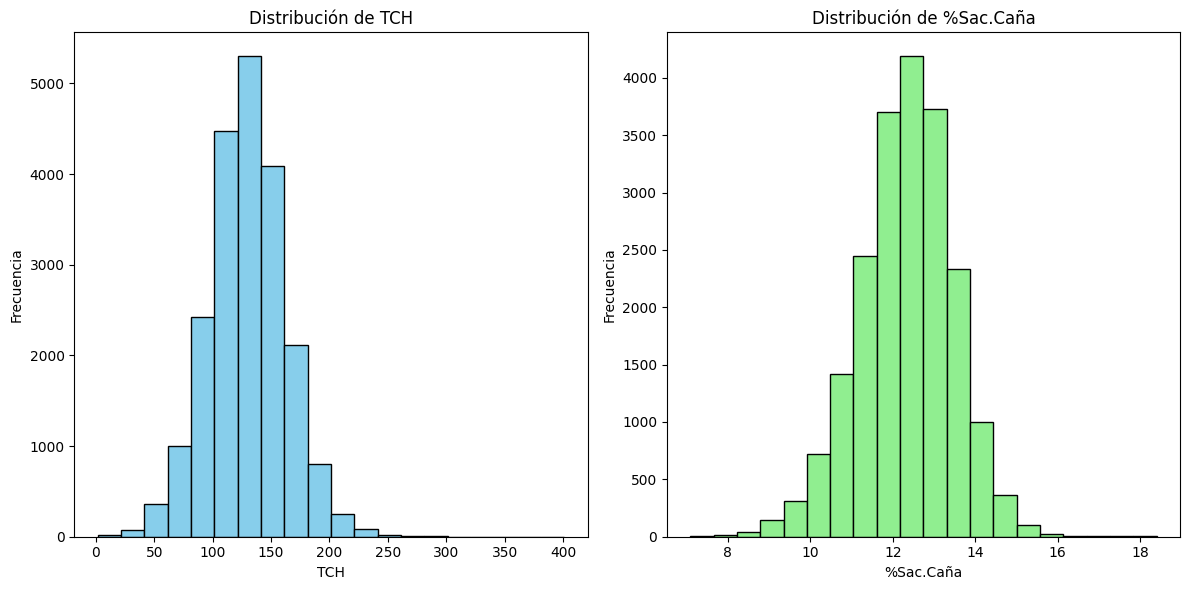

In [2]:
# Visualización de distribuciones
plt.figure(figsize=(12, 6))

# Histograma de TCH
plt.subplot(1, 2, 1)
plt.hist(dfHis['TCH'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de TCH')
plt.xlabel('TCH')
plt.ylabel('Frecuencia')

# Histograma de %Sac.Caña
plt.subplot(1, 2, 2)
plt.hist(dfHis['%Sac.Caña'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de %Sac.Caña')
plt.xlabel('%Sac.Caña')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

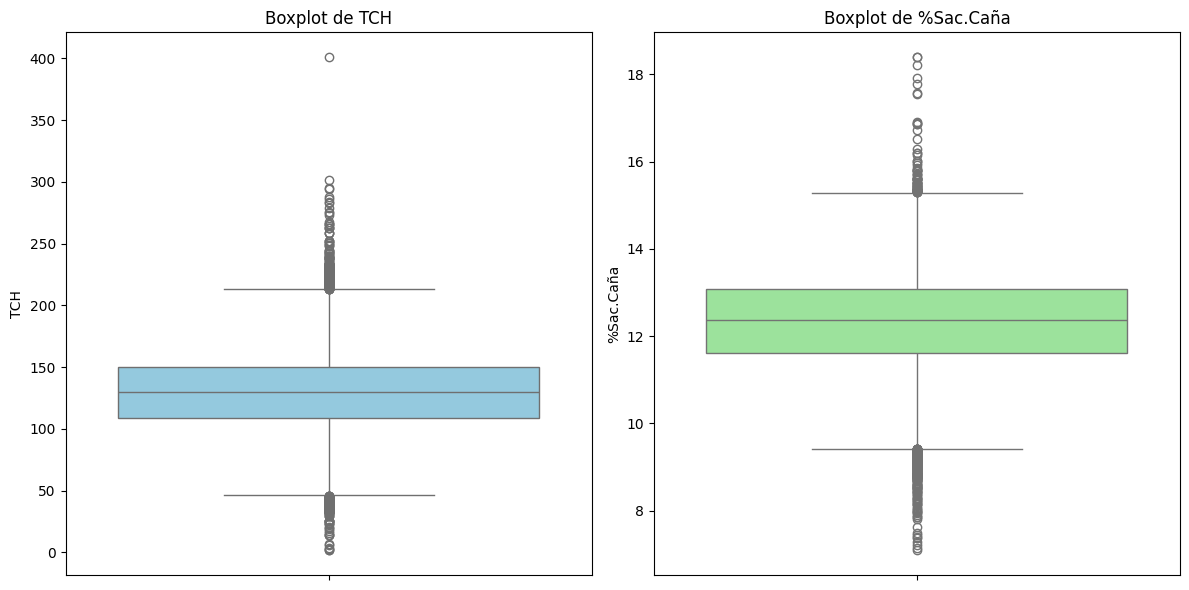

In [3]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))

# Boxplot de TCH
plt.subplot(1, 2, 1)
sns.boxplot(y=dfHis['TCH'], color='skyblue')
plt.title('Boxplot de TCH')

# Boxplot de %Sac.Caña
plt.subplot(1, 2, 2)
sns.boxplot(y=dfHis['%Sac.Caña'], color='lightgreen')
plt.title('Boxplot de %Sac.Caña')

plt.tight_layout()
plt.show()

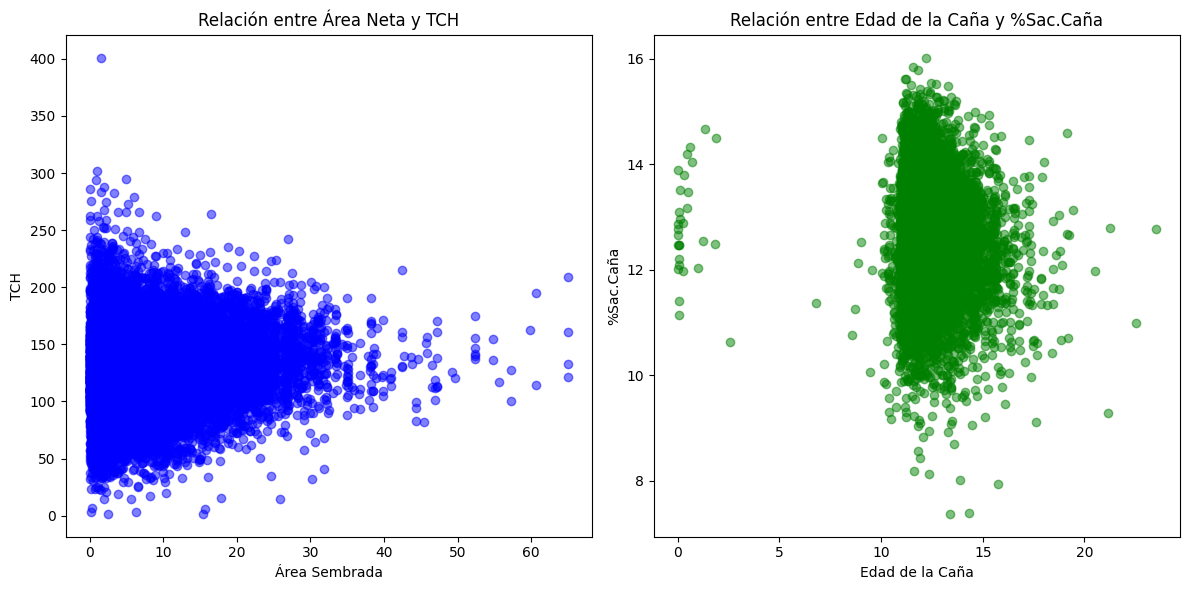

In [4]:
# Gráficos de dispersión
plt.figure(figsize=(12, 6))

# Relación entre TCH y Área Neta
plt.subplot(1, 2, 1)
plt.scatter(dfHis['Area Neta'], dfHis['TCH'], color='blue', alpha=0.5)
plt.title('Relación entre Área Neta y TCH')
plt.xlabel('Área Sembrada')
plt.ylabel('TCH')

# Relación entre %Sac.Caña y otra variable (ejemplo: edad de la caña)
plt.subplot(1, 2, 2)
plt.scatter(dfHis['Edad.Precosecha'], dfHis['%Sac.Caña'], color='green', alpha=0.5)
plt.title('Relación entre Edad de la Caña y %Sac.Caña')
plt.xlabel('Edad de la Caña')
plt.ylabel('%Sac.Caña')

plt.tight_layout()
plt.show()

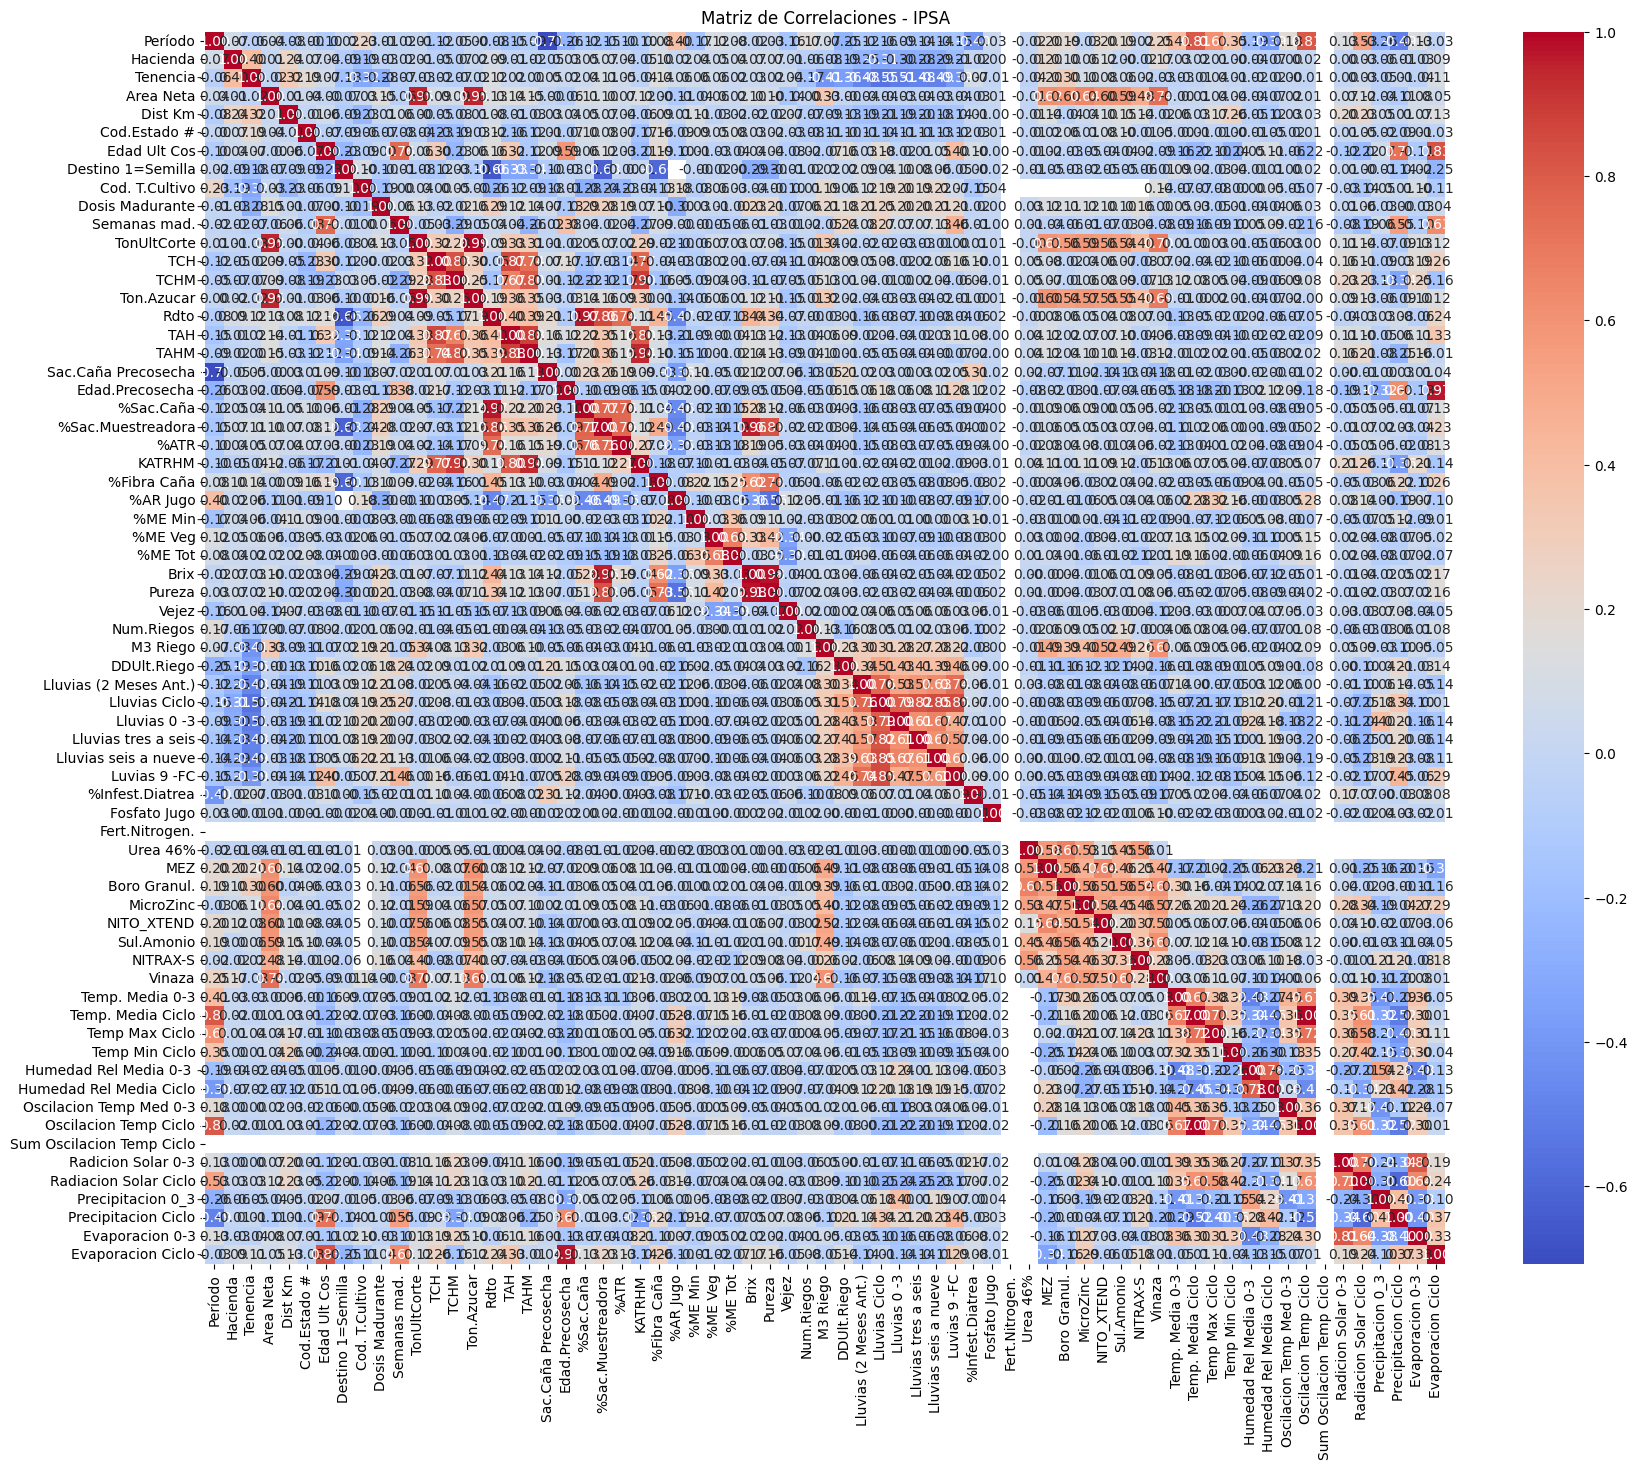

In [5]:
correlation_matrix =dfHis.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones - IPSA")
plt.show()

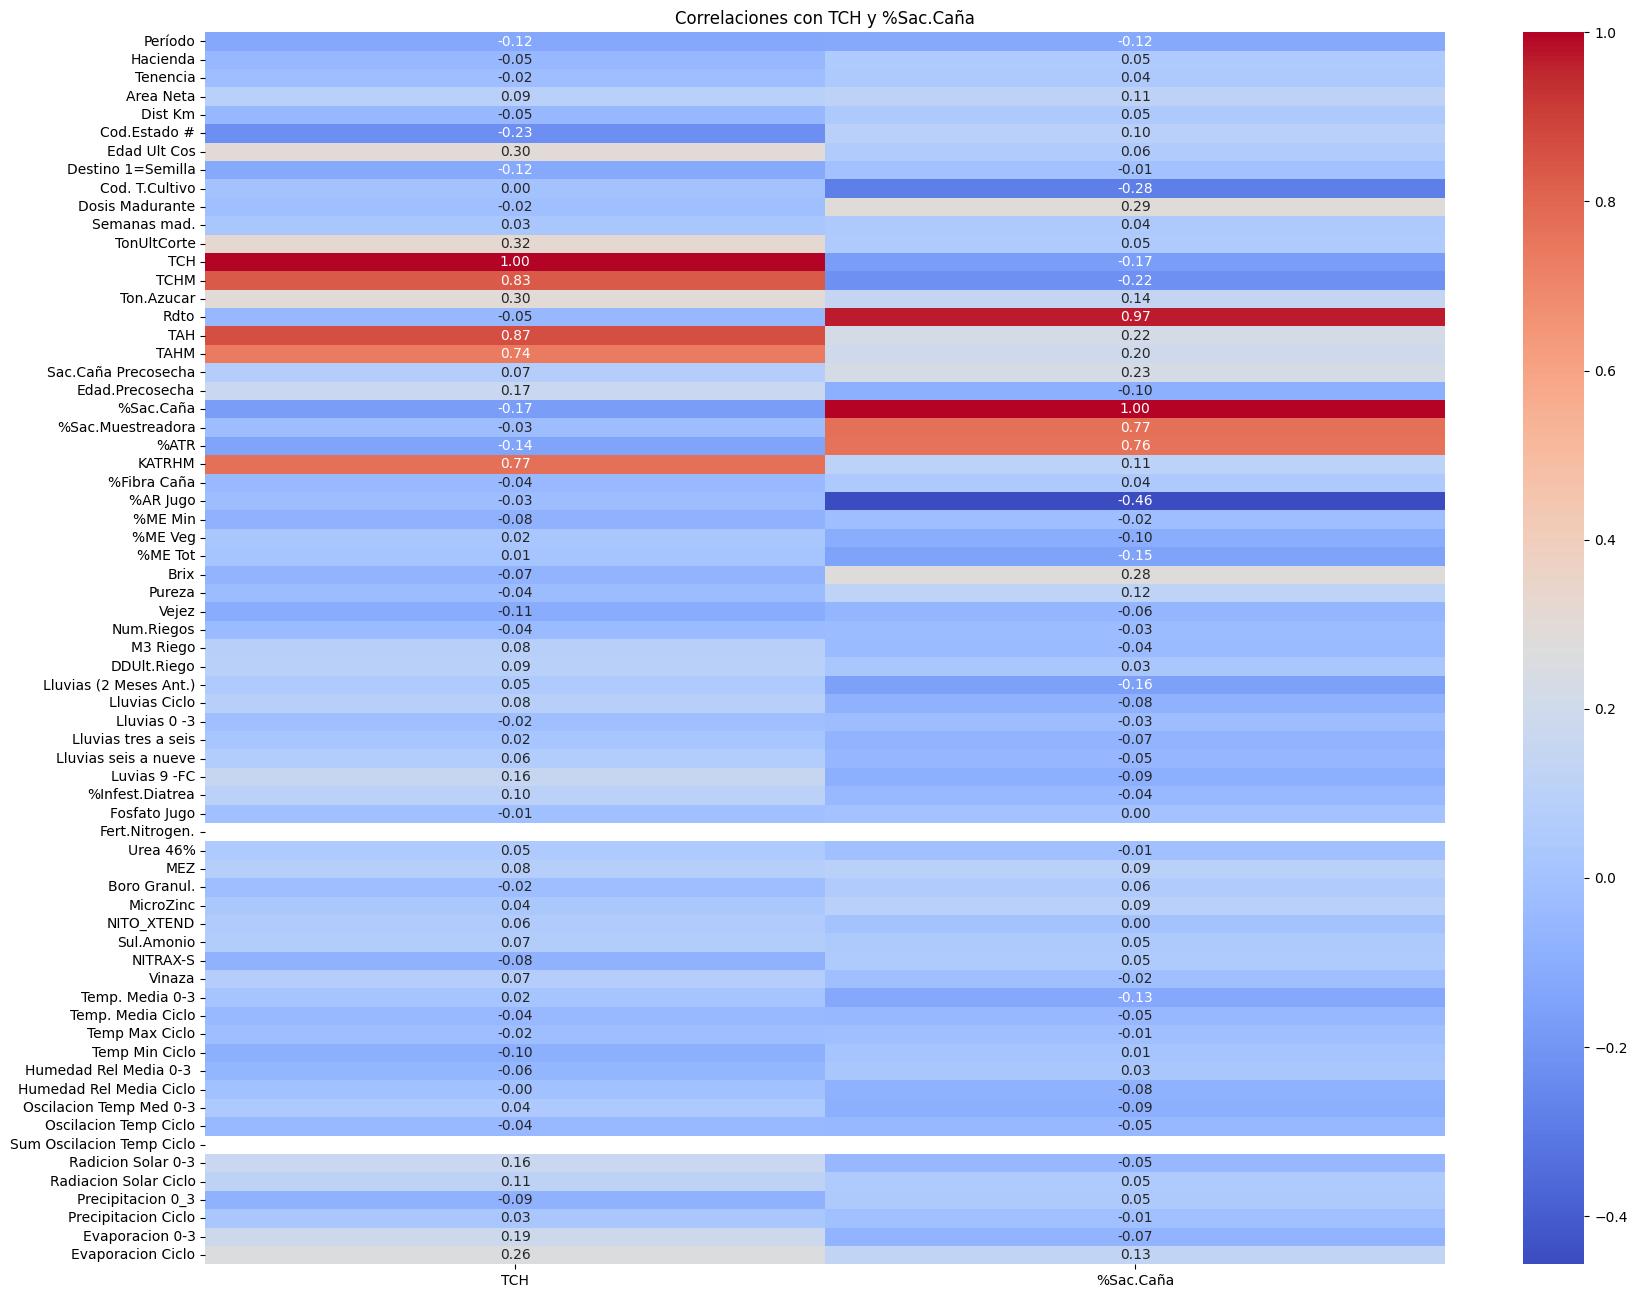

In [6]:
# Filtrar correlaciones con TCH y %Sac.Caña
correlation_with_target = correlation_matrix[['TCH', '%Sac.Caña']]
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlaciones con TCH y %Sac.Caña")
plt.show()

In [7]:
correlation_threshold = 0.4  # Define un umbral de correlación
relevant_features_tch = correlation_matrix['TCH'][abs(correlation_matrix['TCH']) > correlation_threshold].index.tolist()
relevant_features_sac_caña = correlation_matrix['%Sac.Caña'][abs(correlation_matrix['%Sac.Caña']) > correlation_threshold].index.tolist()

print("Variables relevantes para TCH:", relevant_features_tch)
print("Variables relevantes para %Sac.Caña:", relevant_features_sac_caña)

Variables relevantes para TCH: ['TCH', 'TCHM', 'TAH', 'TAHM', 'KATRHM']
Variables relevantes para %Sac.Caña: ['Rdto', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', '%AR Jugo']


In [8]:
# Mostrar todas las columnas y la cantidad de valores nulos en cada una
nulos_por_variable = dfHis.isna().sum()
print(nulos_por_variable)

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64


In [9]:
# Porcentaje de valores nulos por columna
nulos_por_variable = dfHis.isnull().sum() / len(dfHis) * 100
print(nulos_por_variable.sort_values(ascending=False))

Sum Oscilacion Temp Ciclo    100.000000
Fert.Nitrogen.               100.000000
Urea 46%                      96.561564
NITRAX-S                      96.442669
MEZ                           95.382128
                                ...    
Lluvias seis a nueve           0.000000
Luvias 9 -FC                   0.000000
Lluvias tres a seis            0.000000
Lluvias 0 -3                   0.000000
Lluvias Ciclo                  0.000000
Length: 85, dtype: float64


In [10]:
# Eliminar columnas con más del 50% de valores nulos
threshold = 50  # Porcentaje límite
columnas_a_eliminar = nulos_por_variable[nulos_por_variable > threshold].index
cleandfHis = dfHis.drop(columns=columnas_a_eliminar)

# Eliminar filas con valores nulos en columnas clave
cleandfHis = cleandfHis.dropna(subset=['TCH', '%Sac.Caña'])

In [11]:
cleandfHis.isna().sum()  # Verificar si quedan valores nulos

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
Suerte                       0
Suelo                     3731
Area Neta                    0
Dist Km                      5
Variedad                     0
Cod.Estado #                 0
Cod.Estado                   0
F.Siembra                    0
Edad Ult Cos                 0
F.Ult.Corte                  0
Destino 1=Semilla            0
Cod. T.Cultivo               2
Cultivo                      2
Fec.Madur.                9416
Producto                  9419
Dosis Madurante             96
Semanas mad.              9416
TonUltCorte                  0
TCH                          0
TCHM                         0
Ton.Azucar                   0
Rdto                         0
TAH                          0
TAHM                         0
Sac.Caña Precosecha       1093
%Sac.Caña                    0
%Sac.Muestreadora         1591
%ATR    

In [12]:
# Eliminar columnas con más del 50% de valores nulos
threshold = 50  # Porcentaje límite
columnas_a_reemplazar = nulos_por_variable[nulos_por_variable <= threshold].index
# Fill only numeric columns with their mean values
numeric_columns = cleandfHis.select_dtypes(include=['number']).columns
cleandfHis[numeric_columns] = cleandfHis[numeric_columns].fillna(dfHis[numeric_columns].mean())

In [13]:
columnas_string=cleandfHis.select_dtypes(include=['object']).columns  # Verificar columnas no numéricas
columnas_fecha = cleandfHis.select_dtypes(include=['datetime']).columns  # Verificar columnas de fecha
for col in columnas_string:
    if cleandfHis[col].isnull().sum() > 0:  # Solo reemplazar si hay valores nulos
        cleandfHis[col] = cleandfHis[col].fillna(cleandfHis[col].mode()[0])  # Reemplazar con la moda de la columna

for col in columnas_fecha:
    if cleandfHis[col].isnull().sum() > 0:  # Solo reemplazar si hay valores nulos
        cleandfHis[col] = cleandfHis[col].fillna(cleandfHis[col].mode()[0])  # Reemplazar con la moda de la columna

In [14]:
cleandfHis.isna().sum()  # Verificar si quedan valores nulos

Período                   0
Hacienda                  0
Nombre                    0
Zona                      0
Tenencia                  0
Suerte                    0
Suelo                     0
Area Neta                 0
Dist Km                   0
Variedad                  0
Cod.Estado #              0
Cod.Estado                0
F.Siembra                 0
Edad Ult Cos              0
F.Ult.Corte               0
Destino 1=Semilla         0
Cod. T.Cultivo            0
Cultivo                   0
Fec.Madur.                0
Producto                  0
Dosis Madurante           0
Semanas mad.              0
TonUltCorte               0
TCH                       0
TCHM                      0
Ton.Azucar                0
Rdto                      0
TAH                       0
TAHM                      0
Sac.Caña Precosecha       0
%Sac.Caña                 0
%Sac.Muestreadora         0
%ATR                      0
KATRHM                    0
%Fibra Caña               0
%AR Jugo            

In [19]:
from sklearn.model_selection import train_test_split

# Variables independientes (features) y dependientes (targets)
X_tch = cleandfHis[relevant_features_tch].drop(columns=['TCH'])  # Excluye la variable objetivo
y_tch = cleandfHis['TCH']

X_sac_caña = cleandfHis[relevant_features_sac_caña].drop(columns=['%Sac.Caña'])
y_sac_caña = cleandfHis['%Sac.Caña']

# División en entrenamiento y prueba
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)
X_train_sac_caña, X_test_sac_caña, y_train_sac_caña, y_test_sac_caña = train_test_split(X_sac_caña, y_sac_caña, test_size=0.2, random_state=42)

In [20]:
# Verificar valores nulos en los conjuntos de entrenamiento y prueba
print("Valores nulos en X_train_tch:")
print(X_train_tch.isnull().sum())

print("\nValores nulos en X_test_tch:")
print(X_test_tch.isnull().sum())

print("\nValores nulos en X_train_sac_caña:")
print(X_train_sac_caña.isnull().sum())

print("\nValores nulos en X_test_sac_caña:")
print(X_test_sac_caña.isnull().sum())

Valores nulos en X_train_tch:
TCHM      0
TAH       0
TAHM      0
KATRHM    0
dtype: int64

Valores nulos en X_test_tch:
TCHM      0
TAH       0
TAHM      0
KATRHM    0
dtype: int64

Valores nulos en X_train_sac_caña:
Rdto                 0
%Sac.Muestreadora    0
%ATR                 0
%AR Jugo             0
dtype: int64

Valores nulos en X_test_sac_caña:
Rdto                 0
%Sac.Muestreadora    0
%ATR                 0
%AR Jugo             0
dtype: int64


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelo para TCH
lr_model_tch = LinearRegression()
lr_model_tch.fit(X_train_tch, y_train_tch)

# Predicciones para TCH
y_pred_tch_lr = lr_model_tch.predict(X_test_tch)

# Evaluación del modelo para TCH
print("\n--- Linear Regression (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_lr):.2f}")
print(f"R2 Score: {r2_score(y_test_tch, y_pred_tch_lr):.2f}")

# Modelo para %Sac.Caña
lr_model_sac_caña = LinearRegression()
lr_model_sac_caña.fit(X_train_sac_caña, y_train_sac_caña)

# Predicciones para %Sac.Caña
y_pred_sac_caña_lr = lr_model_sac_caña.predict(X_test_sac_caña)

# Evaluación del modelo para %Sac.Caña
print("\n--- Linear Regression (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac_caña, y_pred_sac_caña_lr):.2f}")
print(f"R2 Score: {r2_score(y_test_sac_caña, y_pred_sac_caña_lr):.2f}")


--- Linear Regression (TCH) ---
MAE: 1.17
MSE: 4.57
R2 Score: 1.00

--- Linear Regression (%Sac.Caña) ---
MAE: 0.11
MSE: 0.05
R2 Score: 0.96


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Modelo para TCH
rf_model_tch = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_tch.fit(X_train_tch, y_train_tch)

# Predicciones para TCH
y_pred_tch_rf = rf_model_tch.predict(X_test_tch)

# Evaluación del modelo para TCH
print("\n--- Random Forest (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_rf):.2f}")
print(f"R2 Score: {r2_score(y_test_tch, y_pred_tch_rf):.2f}")

# Modelo para %Sac.Caña
rf_model_sac_caña = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sac_caña.fit(X_train_sac_caña, y_train_sac_caña)

# Predicciones para %Sac.Caña
y_pred_sac_caña_rf = rf_model_sac_caña.predict(X_test_sac_caña)

# Evaluación del modelo para %Sac.Caña
print("\n--- Random Forest (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac_caña, y_pred_sac_caña_rf):.2f}")
print(f"R2 Score: {r2_score(y_test_sac_caña, y_pred_sac_caña_rf):.2f}")


--- Random Forest (TCH) ---
MAE: 1.35
MSE: 7.03
R2 Score: 0.99

--- Random Forest (%Sac.Caña) ---
MAE: 0.07
MSE: 0.03
R2 Score: 0.98



Resultados para TCH:
              Modelo       MAE       MSE        R2
0  Linear Regression  1.169516  4.568858  0.995745
1      Random Forest  1.346377  7.032932  0.993450

Resultados para %Sac.Caña:
              Modelo       MAE       MSE        R2
0  Linear Regression  0.109850  0.053806  0.959517
1      Random Forest  0.070407  0.028856  0.978289


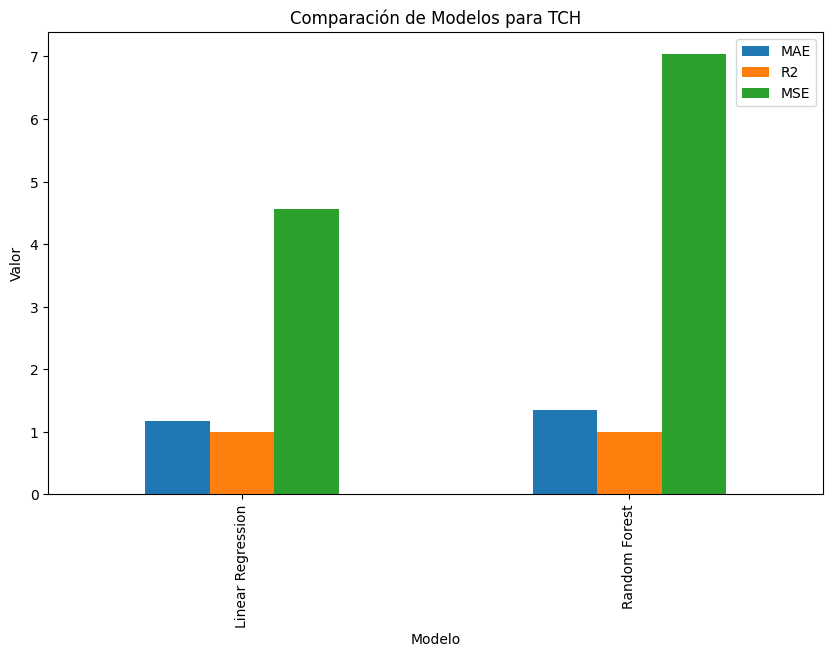

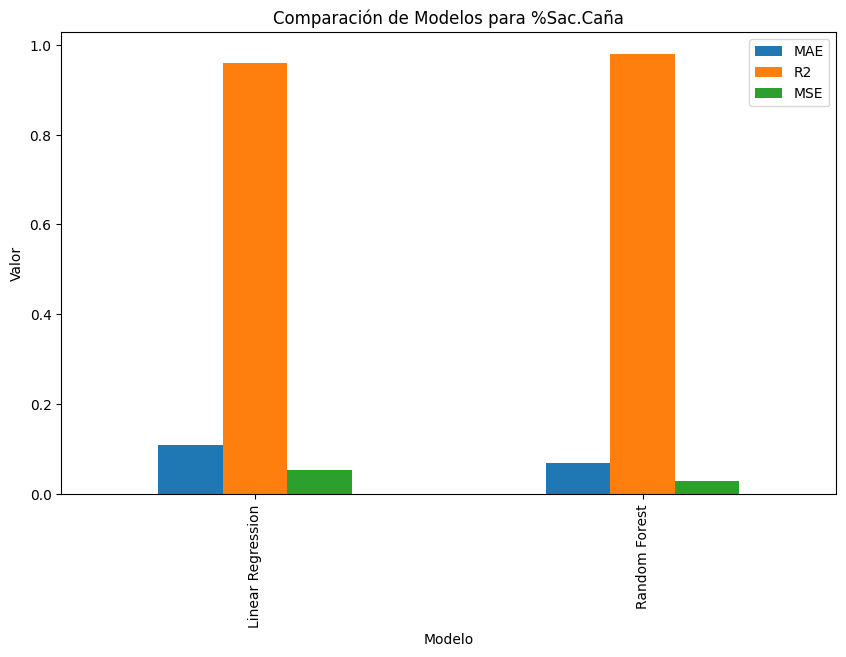

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparar métricas para TCH
resultados_tch = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test_tch, y_pred_tch_lr), mean_absolute_error(y_test_tch, y_pred_tch_rf)],
    'MSE': [mean_squared_error(y_test_tch, y_pred_tch_lr), mean_squared_error(y_test_tch, y_pred_tch_rf)],
    'R2': [r2_score(y_test_tch, y_pred_tch_lr), r2_score(y_test_tch, y_pred_tch_rf)]
})

# Comparar métricas para %Sac.Caña
resultados_sac_caña = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_lr), mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_rf)],
    'MSE': [mean_squared_error(y_test_sac_caña, y_pred_sac_caña_lr), mean_squared_error(y_test_sac_caña, y_pred_sac_caña_rf)],
    'R2': [r2_score(y_test_sac_caña, y_pred_sac_caña_lr), r2_score(y_test_sac_caña, y_pred_sac_caña_rf)]
})

# Visualizar resultados
print("\nResultados para TCH:")
print(resultados_tch)

print("\nResultados para %Sac.Caña:")
print(resultados_sac_caña)

# Gráfico comparativo
resultados_tch.set_index('Modelo')[['MAE', 'R2', 'MSE']].plot(kind='bar', figsize=(10, 6), title="Comparación de Modelos para TCH")
plt.ylabel("Valor")
plt.show()

resultados_sac_caña.set_index('Modelo')[['MAE', 'R2', 'MSE']].plot(kind='bar', figsize=(10, 6), title="Comparación de Modelos para %Sac.Caña")
plt.ylabel("Valor")
plt.show()